In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('ny_events.csv')

In [98]:
# convert columns to datetime
df['Create Time']= pd.to_datetime(df['Create Time'])
df['Close Time']= pd.to_datetime(df['Close Time'])

# extract day, month, year
df['year']=df['Create Time'].apply(lambda x: x.year)
df['month']=df['Create Time'].apply(lambda x: x.month)
df['day']=df['Create Time'].apply(lambda x: x.day)
df['hour']=df['Create Time'].apply(lambda x: x.hour)

# remove data outside NYC 5 B's
nyc = ['Bronx', # Bronx
 'Bronx/New York',
 'Bronx/New York/Queens',
 'Bronx/Queens',
 'New York / Bronx',
'Kings', # Brooklyn
 'Kings County',
 'Kings/New York',
 'Kings/Queens',
 'Kings/Richmond',
 'Brooklyn',
 'New York/Kings',
 'kings',
'Manhattan', # Manhattan
 'New York',
 'New Yrok',
 'New york',
'Queens County', # Queens
 'Queens/Kings/Nassau/Suffok',
 'Queens/New York',
 'New York/Queens',
'Richmond'] # Stat Rats

df = df[df['County'].isin(nyc)]

# drop useless cols
df.drop(columns=[
        'Event Type',
        'Organization Name',
        'Facility Name',
        'Direction',
        'Event Description',
        'Responding Organization Id',
        'State',
        'City'
], inplace=True)

In [99]:
df.head()

,County,Create Time,Close Time,Latitude,Longitude,year,month,day,hour
0,Bronx,2016-02-14 06:05:00,2016-02-14 07:03:00,40.853860,-73.907380,2016,2,14,6
3,New York,2016-02-14 06:21:00,2016-02-14 13:28:00,40.759612,-73.830212,2016,2,14,6
13,Bronx,2016-02-14 06:42:00,2016-02-14 07:01:00,40.819999,-73.890403,2016,2,14,6
14,Bronx,2016-02-14 18:43:00,2016-02-14 18:47:00,40.849576,-73.906111,2016,2,14,18
15,New York,2016-02-14 06:44:00,2016-02-14 11:23:00,40.734451,-73.989983,2016,2,14,6


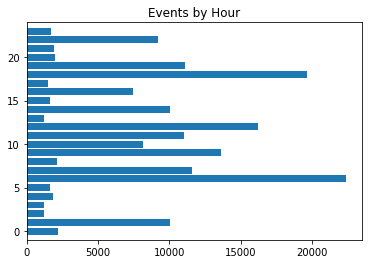

In [129]:
plt.barh(df['hour'].unique(), df['hour'].value_counts())
axes = plt.gca()
axes.set_ylim([-1,24])
plt.title('Events by Hour');

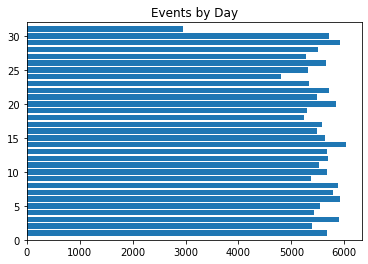

In [130]:
plt.barh(df['day'].unique(), df['day'].value_counts())
axes = plt.gca()
axes.set_ylim([0,32])
plt.title('Events by Day');

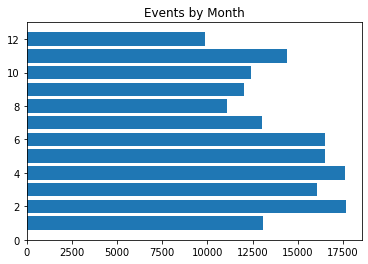

In [131]:
plt.barh(df['month'].unique(), df['month'].value_counts())
axes = plt.gca()
axes.set_ylim([0,13])
plt.title('Events by Month');